NEXT STEPS:
- Hacer que el servidor corra cada día download_prices.py para descargar los precios
- Configurar lista de cartas favoritas para seguir sus precios
- Configurar avisos por mail para subidas/bajadas de precios
- Poner todos los paths en un json que se lea cuando haga falta en vez de poner rutas a mano, por si cambio la estructura de los directorios.

In [1]:
import pandas as pd
import os
import sys
sys.path.append("1_utils")
import functions as fun

In [2]:
if 'df' not in locals():
    path_to_df = os.path.join("0_data", "2_df_final", "df.parquet")
    df = pd.read_parquet(path_to_df)

In [4]:
cardID = 107243
fun.check_cardID(df, cardID)

,name,cardset,rarity,foil,20240630
107243,Wrath of God,DMR,Rare,0,2.82


In [6]:
name, cardset, foil = "Flooded Strand", "ONS", 0
fun.check_cardname(df, name)

,name,cardset,rarity,foil,20240630
18245,Flooded Strand,ONS,Rare,0,8.44
18246,Flooded Strand,ONS,Rare,1,9.99
43580,Flooded Strand,PRM,Rare,0,5.59
54194,Flooded Strand,KTK,Rare,0,1.20
54195,Flooded Strand,KTK,Rare,1,1.90
58839,Flooded Strand,EXP,Mythic,0,5.59
58840,Flooded Strand,EXP,Mythic,1,2.87
69252,Flooded Strand,PRM,Rare,0,5.59
83569,Flooded Strand,ZNE,Mythic,0,8.67


In [4]:
fun.price_analysis(df, name, cardset, foil)

(0.11, 7.19, 8.44, 18.99)

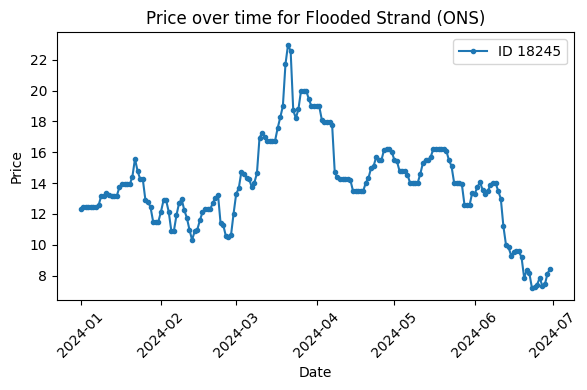

In [5]:
fun.plot_card_prices(df, name, cardset, foil)